   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...      

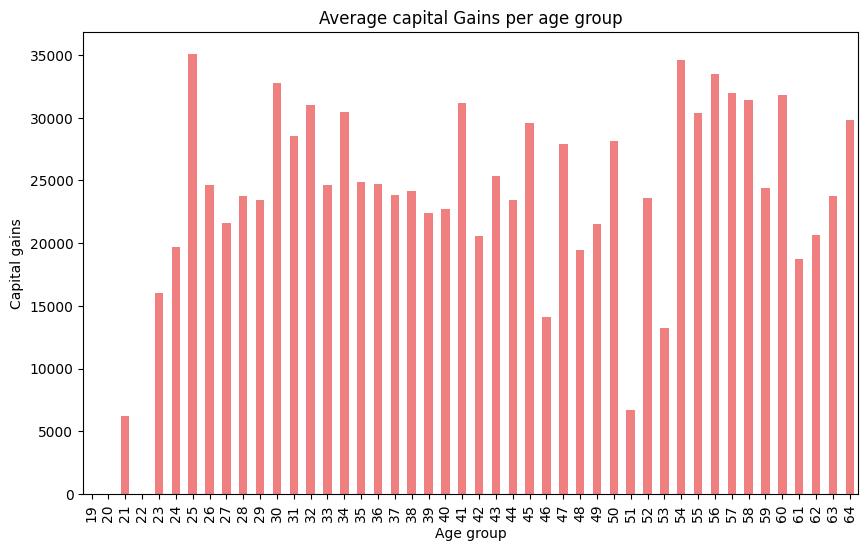

In [2]:
# Individual Assignment for Python Class - Vehicle Insurance Analysis via Python
## copyrighted by Aleksas Slavinskas & the publications office of Grand Duchy of Lithuania
## DECLARATIONS

# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('insurance_claims.csv') #reading the dataset
print(df.head(5)) #printing the top of the dataset to see if it is ok
df.info() # getting some basic info on the data set, such as

print(df.describe()) # generating summary statisctis

#below we are generating a graph to see capital gains by age group, on average
plt.figure(figsize=(10, 6))  # Setting figure size
avg_capital_gains_per_age = df.groupby('age')['capital-gains'].mean() #generating content for the plot - grouping the averages of capital gains by age
avg_capital_gains_per_age.plot(kind='bar', color='lightcoral') #setting the plot to be a bar chart and choosing its colour
plt.title('Average capital Gains per age group') # naming the plot
plt.xlabel('Age group') # naming the X axis
plt.ylabel('Capital gains') # naming the Y axis
plt.show() #showing the plot or graph
# it was decided that the data is relatively clean additional changes are not needed

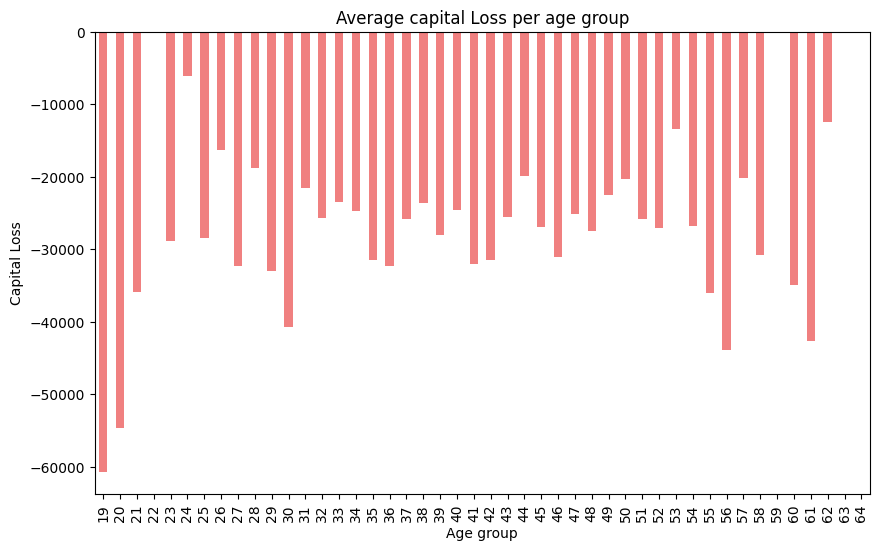

In [3]:
#below we are generating a graph to see capital losses by age group, on average
plt.figure(figsize=(10, 6)) # Setting figure size
avg_capital_loss_per_age = df.groupby('age')['capital-loss'].mean() #generating content for the plot - grouping the averages of capital losses by age
avg_capital_loss_per_age.plot(kind='bar', color='lightcoral') #setting the plot to be a bar chart and choosing its colour
plt.title('Average capital Loss per age group') # naming the plot
plt.xlabel('Age group') # naming the X axis
plt.ylabel('Capital Loss') # naming the Y axis
plt.show() #showing the plot or graph

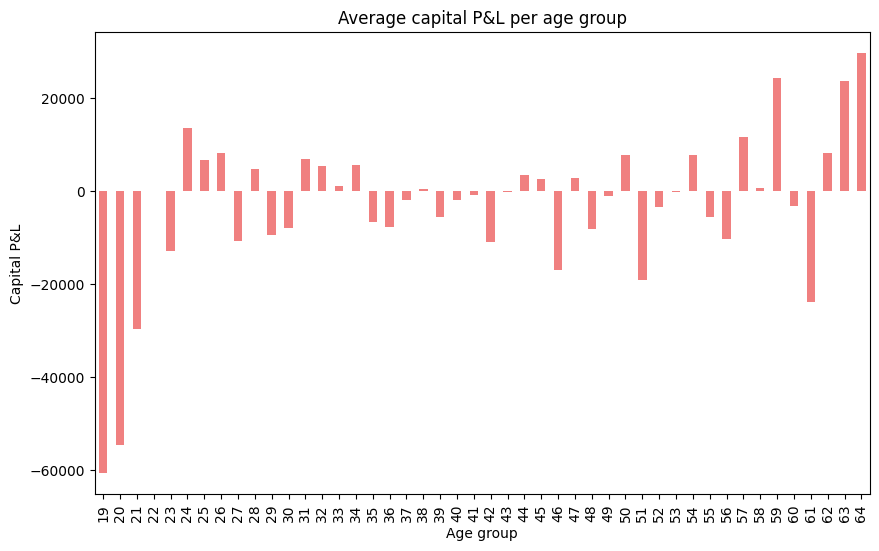

In [4]:
# below we will generate a barchart that will look what are the combined capital losses or gains for each age
plt.figure(figsize=(10, 6)) # Setting figure size
avg_capital_PL_per_age_group = avg_capital_gains_per_age + avg_capital_loss_per_age #finding capital P&L by combining capital gains and capital losses ( capital losses are a negative number)
avg_capital_PL_per_age_group.plot(kind='bar', color='lightcoral') #setting the plot to display the previously found variable and be a bar chart and choosing its colour
plt.title('Average capital P&L per age group') # naming the plot
plt.xlabel('Age group') # naming the X axis
plt.ylabel('Capital P&L') # naming the Y axis
plt.show() #showing the plot or graph

In [6]:
# calculating the total sum value from claims, and whether it is capital profit or loss
total_PL_from_claims = df['capital-gains'].sum() + df['capital-loss'].sum()
print('Total capital change from claims payed out and received: ', total_PL_from_claims)

Total capital change from claims payed out and received:  -1667600


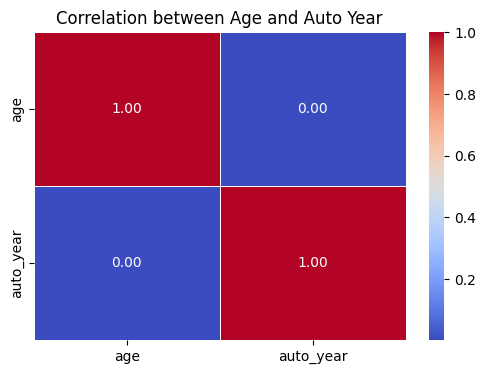

In [7]:
# Plotting a heatmap to find a correlation between vehicle age and persons age
selected_columns = ['age', 'auto_year'] # Selecting columns for correlation: 'age' and 'auto_year'
correlation_matrix = df[selected_columns].corr() #inputing the variable and using corr function to activate the correlation calculation
plt.figure(figsize=(6, 4)) # Setting figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) # we use seaborn library to generate the visual heatmap, input the correlation that we got calculated, display the numerical correlation values on the heatmap cells, set the colour, and setting the format of the text & line width between cells
plt.title('Correlation between Age and Auto Year') # naming the plot
plt.show() #showing the plot or graph

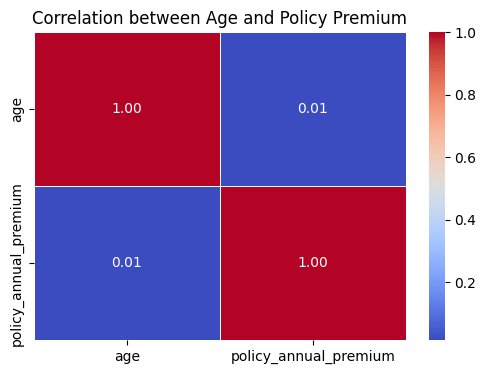

In [8]:
# Plotting a heatmap to find a correlation between vehicle age and annual policy premiums
selected_columns2 = ['age', 'policy_annual_premium'] # Selecting columns for correlation: 'age' and 'auto_year'
correlation_matrix = df[selected_columns2].corr() # making a correlation calculation with inputted data columns
plt.figure(figsize=(6, 4)) # Setting figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)  # we use seaborn library to generate the visual heatmap
plt.title('Correlation between Age and Policy Premium') # naming the plot
plt.show() #showing the plot or graph

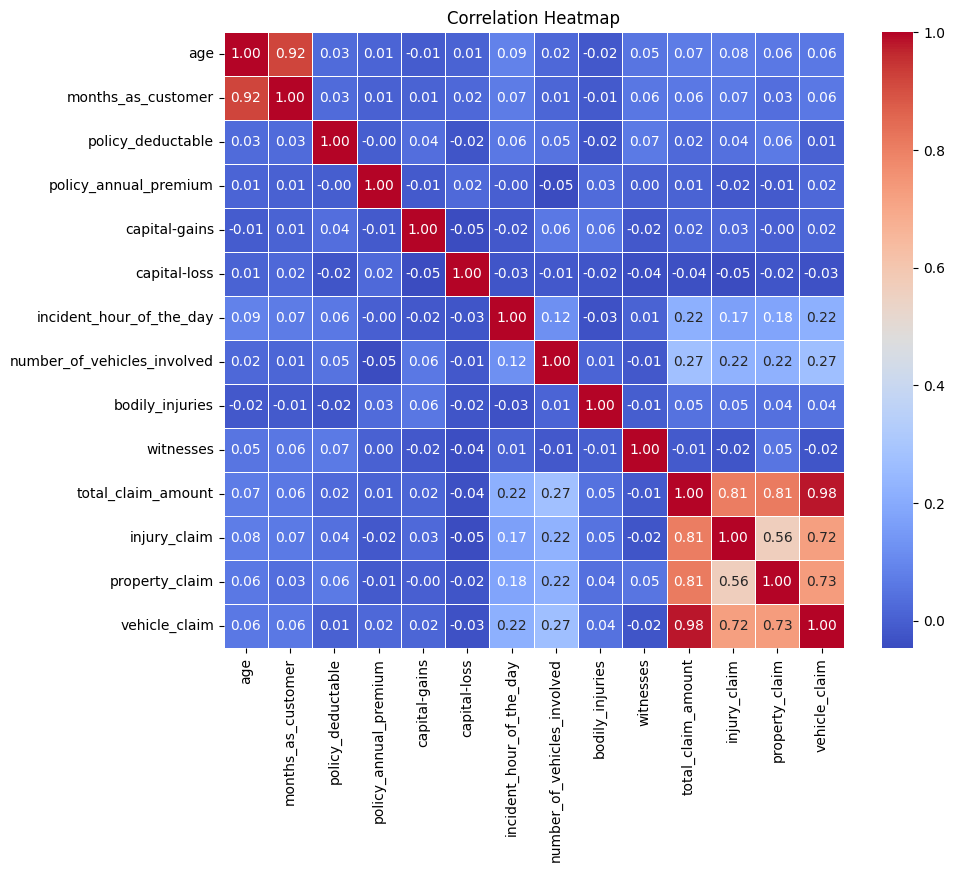

In [9]:
# here will make a correlation matrix to calculate correlations for all at one go
# Select numeric columns for correlation, including 'age' and 'vehicle_age'
numeric_columns = ['age', 'vehicle_age', 'months_as_customer', 'policy_deductable', 'policy_annual_premium', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']
numeric_columns = [col for col in numeric_columns if col in df.columns] # (ChatGPT, 2024) we essentially filter the column names to only include those that exist in the data frame by iterating through each column name and and checking whether the column name exists
correlation_matrix = df[numeric_columns].corr() # making a correlation calculation with inputted data columns
plt.figure(figsize=(10, 8)) # Setting figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) # we use seaborn library to generate the visual heatmap
plt.title('Correlation Heatmap') # naming the plot
plt.show() #showing the plot or graph

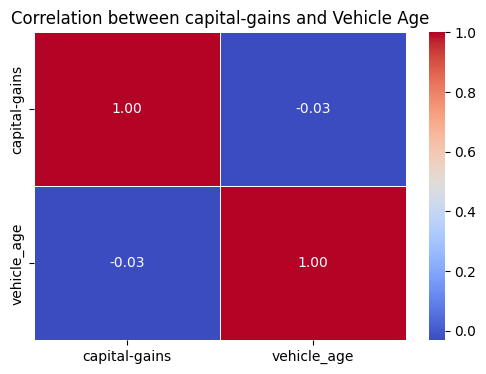

In [10]:
# we will be making a heatmap to find whether there is a correlation between vehicle age and whether there was capital gains
df['vehicle_age'] = 2024 - df['auto_year'] #creating a new column, to find vehicle age we have to deduct current year 2024 from when the vehicle was made
selected_columns = ['capital-gains', 'vehicle_age'] # Select columns for correlation: 'capital-gains' and 'vehicle_age'
correlation_matrix2 = df[selected_columns].corr() # making a correlation calculation with inputted data columns
plt.figure(figsize=(6, 4)) # Setting figure size
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) # we use seaborn library to generate the visual heatmap
plt.title('Correlation between capital-gains and Vehicle Age') # naming the plot
plt.show() #showing the plot or graph

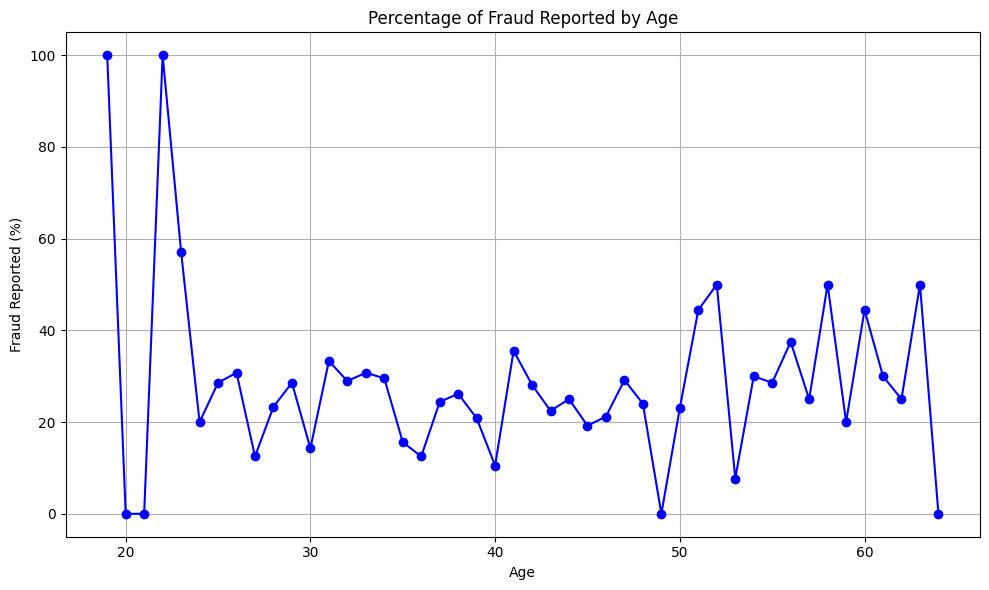

In [11]:
# We will calculate the percentage of fraud reported for each age
fraud_percentage_by_age = df.groupby('age')['fraud_reported'].apply(
    lambda x: (x == 'Y').sum() / len(x) * 100
).reset_index(name='fraud_percentage') # (ChatGPT4, 2024) calculating the percentage of fraud_percentage for each age group. We use lambda because it can create a nameless function that is temporary. We sum the values of Y, which stand for fraud, and find the % of all values

plt.figure(figsize=(10, 6)) # Setting figure size
plt.plot(fraud_percentage_by_age['age'], fraud_percentage_by_age['fraud_percentage'], marker='o', color='b')
plt.title('Percentage of Fraud Reported by Age') # naming the plot
plt.xlabel('Age') # naming the X axis
plt.ylabel('Fraud Reported (%)') # naming the Y axis
plt.grid(True) # adding a grid to make it easier to understand
plt.tight_layout() # adjust the layout of the grid so it does not overlap and is readable
plt.show() #showing the plot or graph

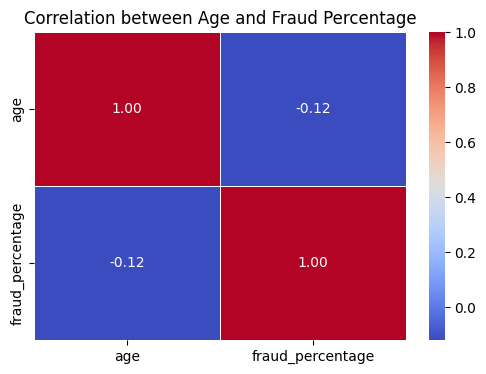

In [12]:
merged_data = df.merge(fraud_percentage_by_age, on='age', how='left') # Merging the fraud percentage back into the original dataset
correlation_data = merged_data[['age', 'fraud_percentage']].drop_duplicates() # Selecting columns for correlation between age and fraud_percentage
correlation_matrix3 = correlation_data.corr() # making a correlation calculation with inputted data columns
plt.figure(figsize=(6, 4)) # Setting figure size
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) # we use seaborn library to generate the visual heatmap
plt.title('Correlation between Age and Fraud Percentage') # naming the plot
plt.show() #showing the plot or graph

In [ ]:
# one of the main limitations regarding the calculation of whether the customer is paying a fair amount of money or not for the risk category that they are,
# is having more data regarding the customer/insured person. For example, how much they travel a year, what is the cost of the insured vehicle, their accident
# history per their distance travelled.

# the other problem was just amount of data and what can be done with it. Technically, still a lot, however often it is useless. Case in point is the last calculation,
# where we do find out that younger people are more likely to commit insurance fraud.
# In the correlation matrix we could see some more, we can see that there are strong correlations between claims of different categories,
# as in if the vehicle has a big claim, injury claim will be also high, etc., etc., which is obvious as it means there was a big incident
